commonly used machine learning algorithms:
    Linear Regression
    
    Logistic Regression
    
    Decision Tree
    
    SVM
    
    Naive Bayes
    
    KNN
    
    K-Means
    
    Random Forest
    
    Dimensionality Reduction Algorithms
    
    Gradient Boost & Adaboost

In [6]:
import cPickle
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import operator
import pandas.io.data
from sklearn.qda import QDA
import re
from dateutil import parser
import bt #http://pmorissette.github.io/bt/install.html
#from backtest import Strategy, Portfolio
import talib

DATA

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/home/octo/Desktop/QTPY/data/min/'
#path = '/home/octo/Desktop/QTPY/data/sec/'

In [ ]:
data1=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [9]:
#open() forms list format that can not be converted to HDFSstore
h5s = pd.HDFStore(path + 'SPY.h5s', 'w')

In [ ]:
h5s['SPY'] =data1

In [ ]:
h5s.close()

In [3]:
h5s = pd.HDFStore(path + 'SPY.h5s', 'r')
data = h5s['SPY']
h5s.close()

In [4]:
len(data)

245538

In [5]:
rets = np.log(data['open'] / data['open'].shift(1)).dropna()

In [6]:
lags = 5
m = np.zeros((lags + 1, len(rets) - lags))

In [7]:
# generating regression vectors
for i in xrange(lags + 1):
    if i == lags:
        m[i] = rets.values[i:].T
    else:
        m[i] = rets.values[i: i - lags].T

In [8]:
np.shape(m)

(6, 245532)

In [9]:
x = m[:lags].T
y = m[-1]

In [10]:
np.shape(x)

(245532, 5)

In [11]:
np.shape(y)

(245532,)

In [12]:
split = 220000

In [13]:
xtr, xte, ytr, yte = x[:split], x[split:], np.sign(y[:split]), np.sign(y[split:])

In [14]:
np.shape(xtr)

(220000, 5)

In [15]:
np.shape(ytr)

(220000,)

In [16]:
np.shape(xte)

(25532, 5)

In [17]:
np.shape(yte)

(25532,)

Logistic Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [69]:
model = LogisticRegression()

In [70]:
ytr[:6]

array([-1.,  1., -1., -1.,  1., -1.])

In [71]:
model.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
pred = model.predict(xtr)

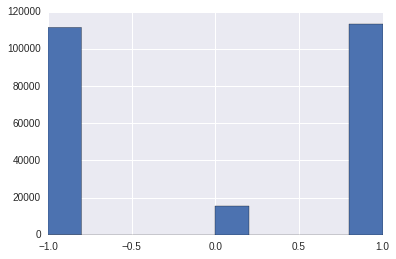

In [74]:
# performance on training data
plt.hist(ytr * pred);

In [75]:
pd.Series(ytr * pred).value_counts()

 1    113181
-1    111487
 0     15332
dtype: int64

In [77]:
pred = model.predict(xte)

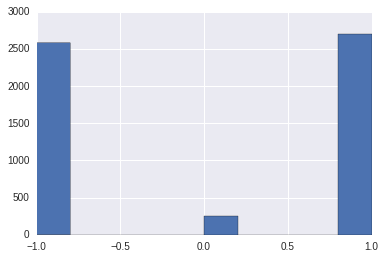

In [78]:
# performance on test data
plt.hist(yte * pred);

In [79]:
sr = pd.Series(yte * pred).value_counts()
sr

 1    2695
-1    2581
 0     246
dtype: int64

In [80]:
sr.apply(lambda x: float(x) / np.sum(sr))

 1    0.488048
-1    0.467403
 0    0.044549
dtype: float64

In [83]:
model.score(xte,yte)#as above

0.48804780876494025

Decision Tree

In [85]:
from sklearn import tree

In [86]:
model = tree.DecisionTreeClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  

In [87]:
model.fit(xtr,ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [88]:
model.score(xtr,ytr)

1.0

In [92]:
pred = model.predict(xtr)

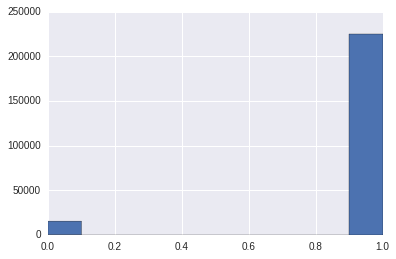

In [93]:
# performance on test data
plt.hist(ytr * pred);

In [91]:
sr = pd.Series(ytr * pred).value_counts()
sr

1    224668
0     15332
dtype: int64

In [95]:
model.score(xte,yte)

0.44549076421586381

In [96]:
pred=model.predict(xte)

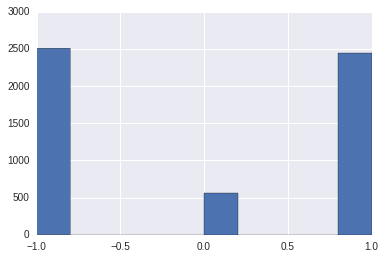

In [98]:
plt.hist(yte*pred);

In [99]:
sr = pd.Series(yte * pred).value_counts()
sr

-1    2508
 1    2448
 0     566
dtype: int64

In [100]:
sr.apply(lambda x: float(x) / np.sum(sr))

-1    0.454183
 1    0.443318
 0    0.102499
dtype: float64

SVM (Support Vector Machine)

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [17]:
#from sklearn import svm
#model = svm.SVC()

In [20]:
svm.fit(xtr,ytr)

KeyboardInterrupt: 

In [ ]:
svm.score(xtr,ytr)

In [ ]:
pred=svm.predict(xte)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

KNN (K- Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=6)

K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3, random_state=0

In [ ]:
model.fit(X)
#Predict Output
predicted= model.predict(x_test)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model= RandomForestClassifier()

Dimensionality Reduction Algorithms

In [ ]:
from sklearn import decomposition

In [ ]:
# Create PCA obeject pca= decomposition.PCA(n_components=k) #default value of k =min(n_sample, n_features)
# For Factor analysis
#fa= decomposition.FactorAnalysis()
# Reduced the dimension of training dataset using PCA
train_reduced = pca.fit_transform(train)
#Reduced the dimension of test dataset
test_reduced = pca.transform(test)

Gradient Boosting & AdaBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)